# Группировка данных

In [1]:
import pandas as pd

bikes = pd.read_pickle('Data/BikesDataVars.pkl')

In [2]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [3]:
bikes['Temperature Category'].value_counts()

Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
Name: Temperature Category, dtype: int64

In [4]:
bikes['Temperature Category'].value_counts(dropna=False)

Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
NaN          179
Name: Temperature Category, dtype: int64

In [5]:
bikes['Good Weather'].value_counts()

0    7948
1     812
Name: Good Weather, dtype: int64

In [6]:
bikes.groupby('Date')['Rental Count'].sum()

Date
2017-12-01     9802
2017-12-02     8404
2017-12-03     8644
2017-12-04     9556
2017-12-05     6578
              ...  
2018-11-26    13934
2018-11-27    13964
2018-11-28    17378
2018-11-29    18058
2018-11-30    17543
Name: Rental Count, Length: 365, dtype: int64

In [7]:
len(list(bikes.groupby('Date')))

365

In [8]:
list(bikes.groupby('Date'))[0][0]

Timestamp('2017-12-01 00:00:00')

In [9]:
list(bikes.groupby('Date'))[0][1].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [10]:
bikes['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [11]:
bikes.groupby('Seasons').size()

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
dtype: int64

In [12]:
bikes.groupby('Seasons')['Temperature Category'].value_counts()

Seasons          
Autumn   Chilly      1138
         Nice         894
         Hot           86
         Freezing      20
Spring   Chilly      1224
         Nice         881
         Hot           27
         Freezing      22
Summer   Hot         1166
         Nice        1003
         Chilly         0
         Freezing       0
Winter   Freezing    1370
         Chilly       750
         Hot            0
         Nice           0
Name: Temperature Category, dtype: int64

In [13]:
bikes.groupby('Seasons')['Normal Humidity'].sum()

Seasons
Autumn    773
Spring    687
Summer    786
Winter    779
Name: Normal Humidity, dtype: int64

In [14]:
bikes.groupby('Seasons')['Rental Count'].sum()

Seasons
Autumn    1769901
Spring    1608905
Summer    2239926
Winter     483327
Name: Rental Count, dtype: int64

In [15]:
bikes.groupby(['Seasons', 'Temperature Category'])['Rental Count'].sum()

Seasons  Temperature Category
Autumn   Chilly                   775694
         Freezing                  12035
         Hot                      134156
         Nice                     811498
Spring   Chilly                   587211
         Freezing                   6331
         Hot                       52993
         Nice                     928572
Summer   Chilly                        0
         Freezing                      0
         Hot                     1315525
         Nice                     892664
Winter   Chilly                   215221
         Freezing                 258570
         Hot                           0
         Nice                          0
Name: Rental Count, dtype: int64

<AxesSubplot:>

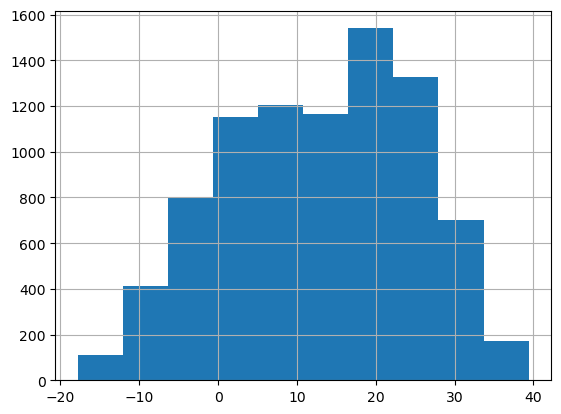

In [16]:
bikes['Temperature'].hist()

-17.8
39.4


<AxesSubplot:>

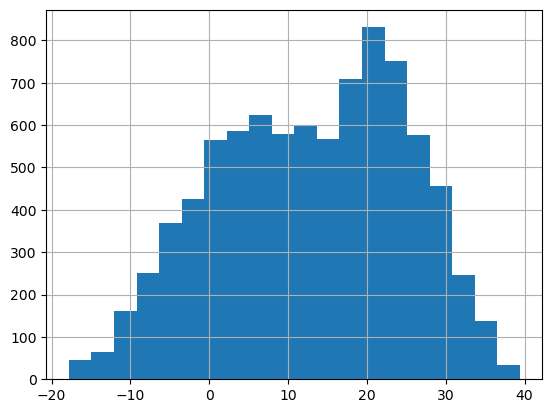

In [17]:
print(min(bikes['Temperature']))
print(max(bikes['Temperature']))

bikes['Temperature'].hist(bins=20)

<AxesSubplot:>

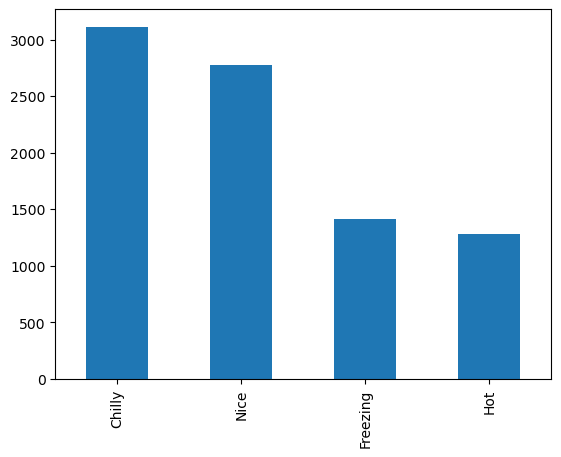

In [18]:
bikes['Temperature Category'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Temperature Category'>

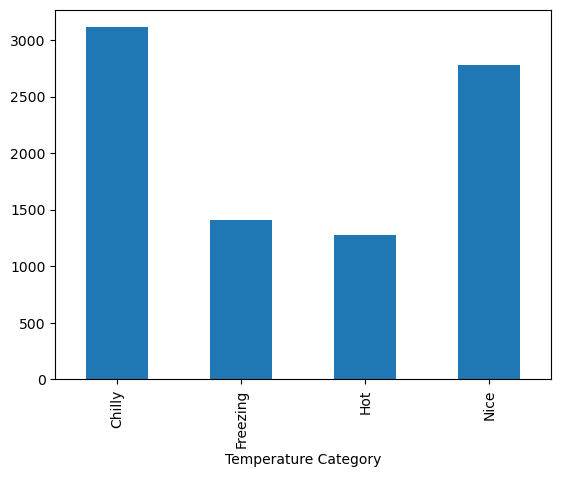

In [19]:
bikes.groupby('Temperature Category').size().plot(kind='bar')

<AxesSubplot:xlabel='Seasons,None'>

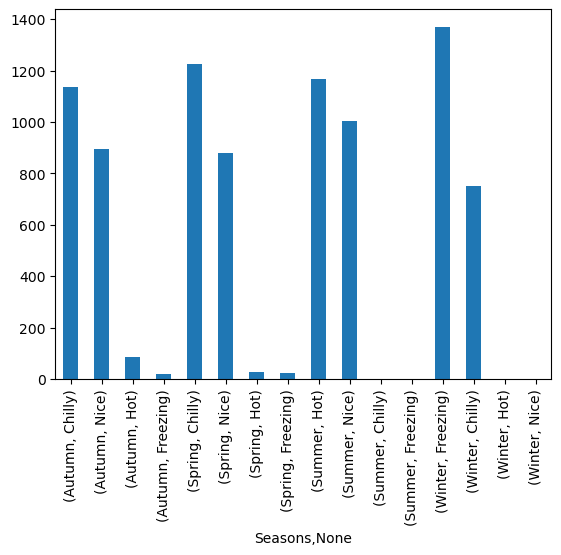

In [20]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().plot(kind='bar')

In [21]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack()

,Chilly,Freezing,Hot,Nice
Seasons,,,,
Autumn,1138,20,86,894
Spring,1224,22,27,881
Summer,0,0,1166,1003
Winter,750,1370,0,0


<AxesSubplot:xlabel='Seasons'>

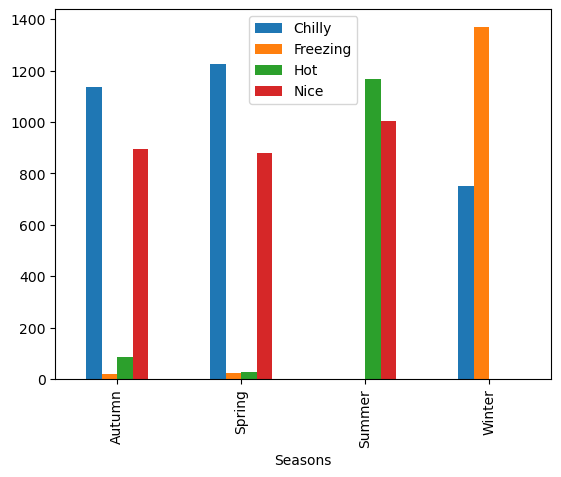

In [22]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Seasons'>

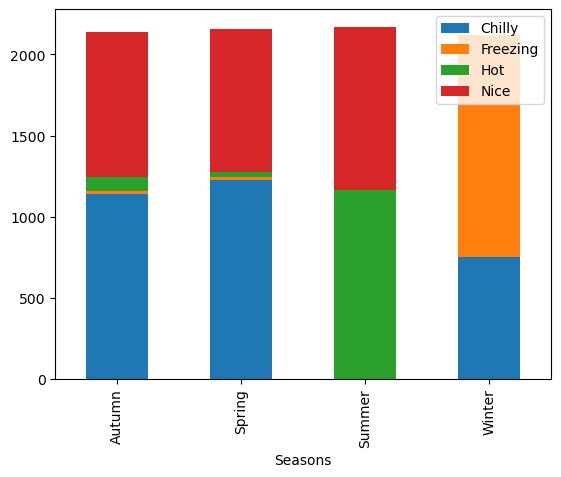

In [23]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind='bar',
                                                                               stacked=True)